<a href="https://colab.research.google.com/github/GladysJoseph/github_python_repo/blob/main/Developing_Ai_Assistants_with_LanChain_Prim_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Developing_AI_Assistints with LangChain**

Prima_Diabetes

Gladys Joseph
April 14, 2024

In [ ]:
!pip install tiktoken;
!pip install openai==1.7.1;
!pip install pypdf;
!pip install faiss-gpu;
!pip install google-search-results;
!pip install cohere;
!pip install pandas;
!pip install matplotlib;
!pip install seaborn;
!pip install langchain_experimental==0.0.49 langchain==0.1.0 langchain-core==0.1.10;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.9/224.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32004 sha256=30b5007be12ac894b03dbcdec3b4c643e653e1b4fc9c5782e221eef3e64910f1
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 3.4 MB/

## **Displaying the OpenAI Library Version**

In [ ]:
!pip3 show openai;

Name: openai
Version: 1.7.1
Summary: The official Python library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: anyio, distro, httpx, pydantic, sniffio, tqdm, typing-extensions
Required-by: 


#**Importing the libraries required**

In [ ]:
import os;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent;
from langchain.llms import OpenAI;
from langchain.chat_models import ChatOpenAI;
from langchain.agents.agent_types import AgentType;

## **Utilizing the OpenAI API Key and API Base**

While the subsequent cells in this notebok have already been run using an OpenAI API Key and API Base with outputs visible, these details are currently not provided in the following cell.

You can access your individual OpenAI API Key and API Base URL through the Settings page in the Olympus Great Learning LMS - please refer to the document with instructions provided separately in order to do this.

In [ ]:
API_KEY = 'gl-U2FsdGVkX19h+p22hlrxGHH31073rom7TxBk6YR1J5r9asF/k15TTBJ7LQvdY/Ry';
OPENAI_API_BASE = 'https://aibe.mygreatlearning.com/openai/v1';

os.environ['OPENAI_API_KEY'] = API_KEY;
os.environ['OPENAI_API_BASE'] = OPENAI_API_BASE;

## **Creating the LLM Instance**

Having provided details to access the OpenAI API, we can now create an LLM instance by using the ChatOpenAI() function and providing a model name - in this case, GPT-4. This LLM is the core of our LangChain agent, and it will be responsible for responding to our user queries (conditional to the additional prompts that LangChain provides it).

In [ ]:


llm = ChatOpenAI(model_name = 'gpt-4');

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


# **Loading in the dataset**

Like we would always do for a Data Science project, we shall begin by using the read_csv() function to load in our dataset. For our trial in this notebook, we shall be working with the Pima Indians Diabetes dataset, a popular open-source Machine Learning dataset that assesses if a person of the Pima tribe origin has diabetes or not, based on a number of health factors.

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Pima_Diabetes.csv");

## **Creating the Pandas DataFrame Agent**

The particular type of LangChain agent we shall be working with is a called a Pandas DataFrame agent - this agent is a specific instance of using an LLM such as GPT-4 to analyze a Pandas DataFrame with custom prompts and instructions provided by LangChain to the LLM for that purpose. We shall also set the verbose parameter in the following function to True, so that we can follow the internal thought process behind how the LLM arrives at its answers.

In [ ]:
# The agent library documentation tool- Action: python_repl_ast-  go to realpython.com/python_repl-repl/ ( this interpret codes)
agent = create_pandas_dataframe_agent(llm = llm, df = df, verbose = True);

#**Query 1: Counting the number of rows**

We can start off with a simple query - let's ask the agent for the number of rows present in this dataset.

In [ ]:
user_message = 'How many rows are there?';
agent.run(user_message);

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
Thought: To find out the number of rows in a dataframe, we can use the `shape` attribute which returns a tuple where the first element is the number of rows and the second is the number of columns.
Action: python_repl_ast
Action Input: df.shape[0]
Observation: 768
Thought:The number of rows in the dataframe is 768.
Final Answer: There are 768 rows.

> Finished chain.




As we can see from above, the LLM agent uses a particular framework provided by LangChain (popularly called the ReAct Framework - Reason and Act), which forces it to carry out a structured thinking process in order to respond to our query. This is subtly different from interacting directly with an assistant-style LLM with our own query and system prompt - in this scenario, LangChain already has a system prompt in place for its agents that asks the LLM to use the ReAct Framework (with Thoughts, Actions and Observations) to come up with the Final Answer.

In the example above, the LLM first generates a Thought on how it can find the number of rows in the DataFrame. This is then converted to an Action, the Pandas code that corresponds to the Thought, and that then leads to an Observation (which is the output of that Pandas code). The LLM then again reasons with itself using another Thought, which deduces that this Observation is in fact the final answer it is required to give, and it frames a Final Answer based on that finding.

The number of these Thought - Action - Observation cycles will vary depending on the complexity of the user query - the more complex the query, the higher the number of such cycles required by the LLM agent to give us our final answer, which in a way, mirrors how we humans arrive at answers to questions of varying complexity with our reasoning process as well.

In the following examples, let's ask EDA-style questions of increasing complexity to the LLM.


## **Query 2: Retrieving the number and names of the columns**

In [ ]:
user_message = 'How many different columns are there in the dataset? What are the names of these columns?';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: The number and names of columns in a pandas dataframe can be obtained by calling the `.columns` property on the dataframe.
Action: python_repl_ast
Action Input: df.columns
Observation: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Thought:The columns property of the dataframe has returned an Index object containing the names of the columns. It can be seen that there are 9 columns, namely 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', and 'Outcome'.
Final Answer: There are 9 different columns in the dataset. The names of these columns are 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', and 'Outcome'.

> Finished chain.


## **Query 3: Checking for missing values in the dataset**

In [ ]:
user_message = 'Are there any missing values in the dataset?';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: To check for missing values in a pandas dataframe, we can use the `isna()` method, which returns a boolean same-sized object indicating if the values are NA/NaN. Then, we can use the `any()` method to check if any value is True in each column.
Action: python_repl_ast
Action Input: df.isna().any()
Observation: Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool
Thought:From the output, I can see that there are no missing values in our dataset because all columns returned False when checked for NaN values.
Final Answer: No, there are no missing values in the dataset.

> Finished chain.


#**Query 4: Obtaining the average age of the people in the dataset**

In [ ]:
user_message = 'What is the average Age in the dataset?';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: To find the average of the 'Age' column in the dataframe, I will use the mean() function provided by pandas.
Action: python_repl_ast
Action Input: df['Age'].mean()
Observation: 33.240885416666664
Thought:I now know the final answer.
Final Answer: The average age in the dataset is approximately 33.24.

> Finished chain.


## **Query 5: Displaying a brief summary of the columns**

In [ ]:
user_message = 'Can you display a brief summary of the columns in the dataset for me?'
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: To provide a brief summary of the columns in the dataset, I can use the `.info()` method of the pandas DataFrame.
Action: python_repl_ast
Action Input: df.info()
Observation: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Thought:I now k

##Query 6: Plotting a Correlation Heatmap**

In this example, we shall ask the agent to plot a correlation heatmap among the columns and comment on the trends observed in terms of which columns seem most strongly correlated with each other. We shall see that the LLM is capable of servicing this more complex request.



> Entering new AgentExecutor chain...
Thought: To plot a correlation heatmap, we first need to calculate the correlation matrix using the `corr()` method of the dataframe. After that, we can use seaborn's heatmap function to plot the correlation matrix. 

Action: python_repl_ast
Action Input: df.corr()
Observation:                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.54

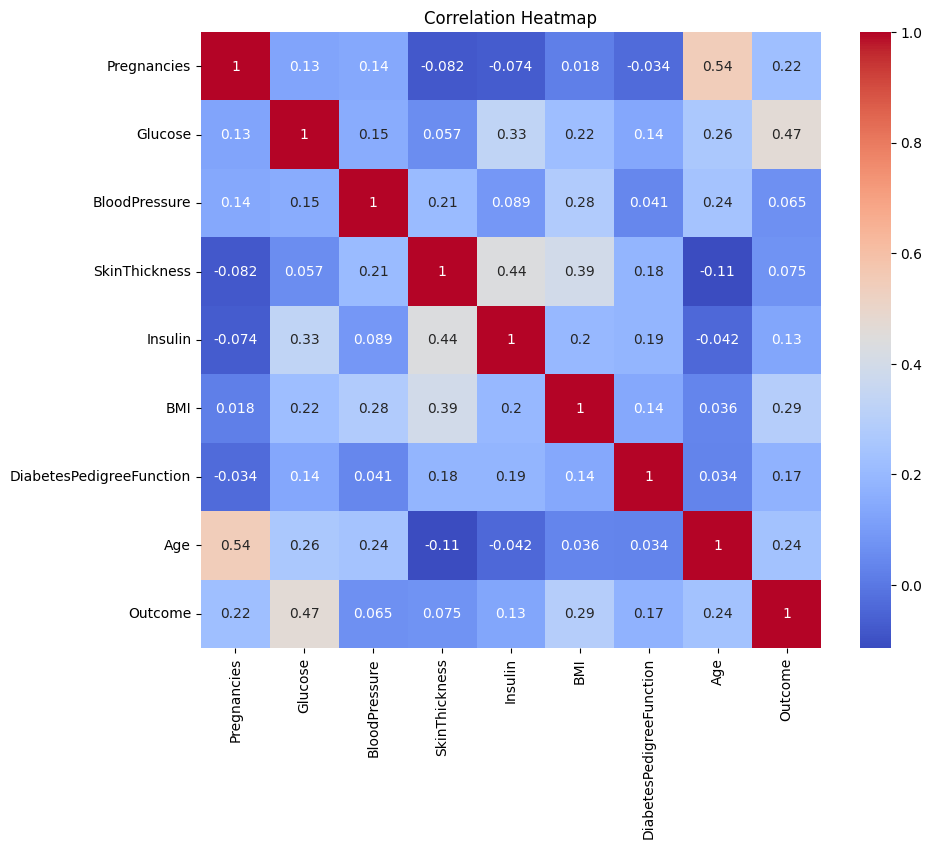


Observation: 
Thought:The heatmap plot cannot be displayed here, but it is expected to show correlations among all the columns in the dataframe. Colors in the heatmap will indicate the strength of the correlation, with warmer colors indicating a strong positive correlation, and cooler colors indicating a strong negative correlation. The diagonal from the top left to the bottom right of the heatmap will show perfect correlation, as it represents the correlation of each variable with itself.

From the correlation matrix above, we see that 'Glucose' and 'Outcome' have a strong positive correlation. Similarly, 'Age' and 'Pregnancies' are also positively correlated. The other variables show a mix of positive and negative correlations but not as strong. 
Final Answer: The correlation heatmap was successfully plotted. From the heatmap, we can observe that 'Glucose' and 'Outcome' have a strong positive correlation, implying that as glucose levels increase, the likelihood of diabetes (Outcome=

In [ ]:
user_message = 'Plot a correlation heatmap, showing correlations among all the columns. Label the axes, and comment on the main trends.';
agent.run(user_message);

## **Query 7: Hypothesis Testing**

In addition to the EDA style queries we have been asking the LLM to service above, it is also capable of performing tasks like Hypothesis Testing to statistically validate a quantitative claim we may have about the data - a useful endeavor when it comes to Data Science decision making. In the following example, we shall ask the LLM to use a T-test to validate whether higher levels of glucose increase the likelihood of diabetes or not.

In [ ]:
user_message = 'Validate the following hypothesis using a T-test. Null Hypothesis: Higher levels of Glucose do not increase the risk of Outcome 1. Alternate Hypothesis: Higher levels of Glucose increase the risk of Outcome 1.';
agent.run(user_message);



> Entering new AgentExecutor chain...
Thought: To accomplish this task, I need to perform a T-test on the Glucose levels of those with Outcome 1 and those without Outcome 1. In Python, the `scipy.stats` module provides the `ttest_ind` function, which can calculate the T-test for the means of two independent samples. However, before I can use that, I need to separate the Glucose levels based on the Outcome.
Action: python_repl_ast
Action Input: df.groupby('Outcome')['Glucose'].apply(list)
Observation: Outcome
0    [85, 89, 116, 115, 110, 139, 103, 126, 99, 97,...
1    [148, 183, 137, 78, 197, 125, 168, 189, 166, 1...
Name: Glucose, dtype: object
Thought:Now I have two lists: one with Glucose levels for those with Outcome 1 and another for those with Outcome 0. I can now proceed to perform the T-test. 
Action: python_repl_ast
Action Input: from scipy.stats import ttest_ind
glucose_0 = df[df['Outcome'] == 0]['Glucose']
glucose_1 = df[df['Outcome'] == 1]['Glucose']
ttest_ind(glucose_0, g

#**Query 8: Machine Learning Modeling**

Finally, we can also get the LLM agent to perform Machine Learning modeling. Let us attempt to create a Logistic Regression model that aims to classify whether a person is likely to have diabetes or not given their health measurements.

Since Machine Learning is a multi-step process - we will need to spell out the exact steps the agent is required to follow, the model it needs to use (Logistic Regression) and the outputs we expect from it (the Confusion Matrix and the Accuracy Score) - as such, a longer, step-by-step prompt will be required.



> Entering new AgentExecutor chain...
Thought: Before I can run a logistic regression model, I need to clean and preprocess the dataset. The first step is to check if the dataframe has any null values.
Action: python_repl_ast
Action Input: df.isnull().sum()
Observation: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Thought:The dataframe has no null values, so we can proceed to the next step, which is preprocessing the data for use in a logistic regression model. This typically involves splitting the data into features (X) and target (y), and then scaling the features.
Action: python_repl_ast
Action Input: from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis=1)
y = df['Outcom

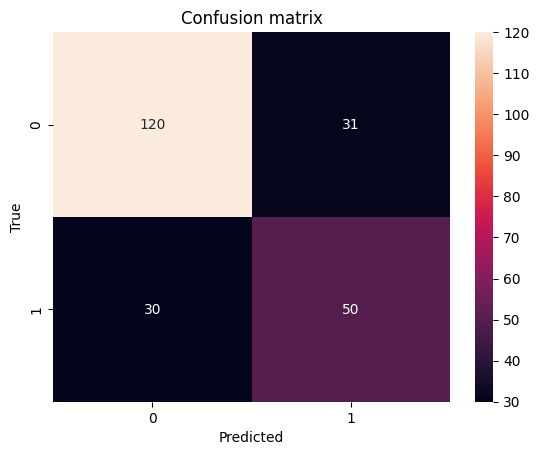


Observation: 0.7359307359307359
Thought:The confusion matrix has been plotted and the accuracy score has been computed. The accuracy score is approximately 0.736, which means that the model correctly predicted the outcome in about 73.6% of the cases in the test set.
Final Answer: The logistic regression model correctly predicted the Outcome variable in approximately 73.6% of the cases in the test set. This is a reasonable performance, but there may be room for improvement by tuning the model or using a different model. The confusion matrix provides more details about the types of errors made by the model.

> Finished chain.


In [ ]:
user_message = 'Follow these steps to run a Logistic Regression model to predict the Outcome variable:\
1. Clean the dataset so it has no null values.\
2. Preprocess the dataset so it is ready for use by a Logistic Regression model.\
3. Run Logistic Regression to classify people into Outcome 1 or Outcome 0 with the following steps:\
3a. Split the data into Train and Test sets. These datasets should not contain the Outcome column.\
3b. Train the model on the Train dataset. Make sure the model converges, so use as many iterations as necessary for that.\
3c. Obtain y_pred by predicting on X_test and use a threshold to convert y_pred into binary values.\
3d. Plot the Confusion Matrix, print the accuracy score between binary y_pred and y_test, and comment on the predictive performance of the model.'

agent.run(user_message);

# **Conclusions**
This learning notebook is a good demonstration of the capabilities of LangChain agents when they work in conjunction with a high-quality LLM, such as GPT-4. In general, experimentation is required with the framing of the exact user query prompt depending on the output required and the exact model being used (while GPT-4 works well and is subsequently a costlier model to use per API call due to its compute size and quality of NLU, weaker OpenAI models such as GPT-4 Turbo or GPT-3.5 Turbo may not give the same quality of results). There are other use cases that LangChain agents have been developed for, such as Database Natural Language Querying and Retrieval-Augmented Generation, which follow a similar structure and allow us to simply give Natural Language queries and commands to obtain the code-oriented results we would expect.